 #                                       COMP-2040: Python Essentials for Data Science and Machine Learning
  
    

#                        Project: Field of Occupation vs. Study

# Data Exploration (EDA)


In [1]:
import pandas as pd

data = pd.read_csv('career_change_prediction_dataset.csv')
data.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


In [2]:
data.dtypes

Field of Study                 object
Current Occupation             object
Age                             int64
Gender                         object
Years of Experience             int64
Education Level                object
Industry Growth Rate           object
Job Satisfaction                int64
Work-Life Balance               int64
Job Opportunities               int64
Salary                          int64
Job Security                    int64
Career Change Interest          int64
Skills Gap                      int64
Family Influence               object
Mentorship Available            int64
Certifications                  int64
Freelancing Experience          int64
Geographic Mobility             int64
Professional Networks           int64
Career Change Events            int64
Technology Adoption             int64
Likely to Change Occupation     int64
dtype: object

In [3]:
data['Mentorship Available'] = data['Mentorship Available'].astype('bool')
data["Gender"] = data["Gender"].astype('category')

In [4]:
data.dtypes

Field of Study                   object
Current Occupation               object
Age                               int64
Gender                         category
Years of Experience               int64
Education Level                  object
Industry Growth Rate             object
Job Satisfaction                  int64
Work-Life Balance                 int64
Job Opportunities                 int64
Salary                            int64
Job Security                      int64
Career Change Interest            int64
Skills Gap                        int64
Family Influence                 object
Mentorship Available               bool
Certifications                    int64
Freelancing Experience            int64
Geographic Mobility               int64
Professional Networks             int64
Career Change Events              int64
Technology Adoption               int64
Likely to Change Occupation       int64
dtype: object

<Axes: xlabel='Likely to Change Occupation'>

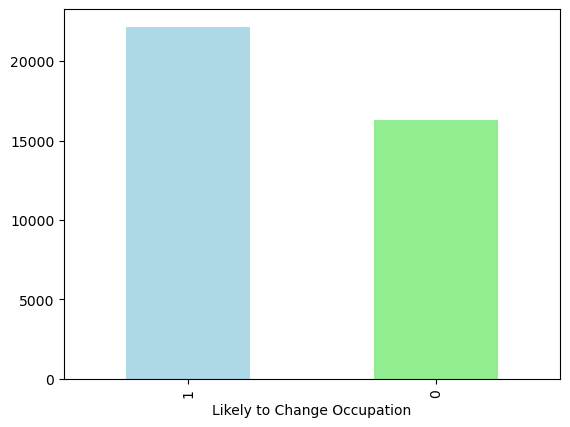

In [5]:
data['Likely to Change Occupation'].value_counts().plot(kind='bar', color=['lightblue', 'lightgreen'])

# Data Cleaning

In [6]:
data.isna()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38439,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38440,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38441,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
38442,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isna().sum()

Field of Study                    0
Current Occupation                0
Age                               0
Gender                            0
Years of Experience               0
Education Level                   0
Industry Growth Rate              0
Job Satisfaction                  0
Work-Life Balance                 0
Job Opportunities                 0
Salary                            0
Job Security                      0
Career Change Interest            0
Skills Gap                        0
Family Influence               9632
Mentorship Available              0
Certifications                    0
Freelancing Experience            0
Geographic Mobility               0
Professional Networks             0
Career Change Events              0
Technology Adoption               0
Likely to Change Occupation       0
dtype: int64

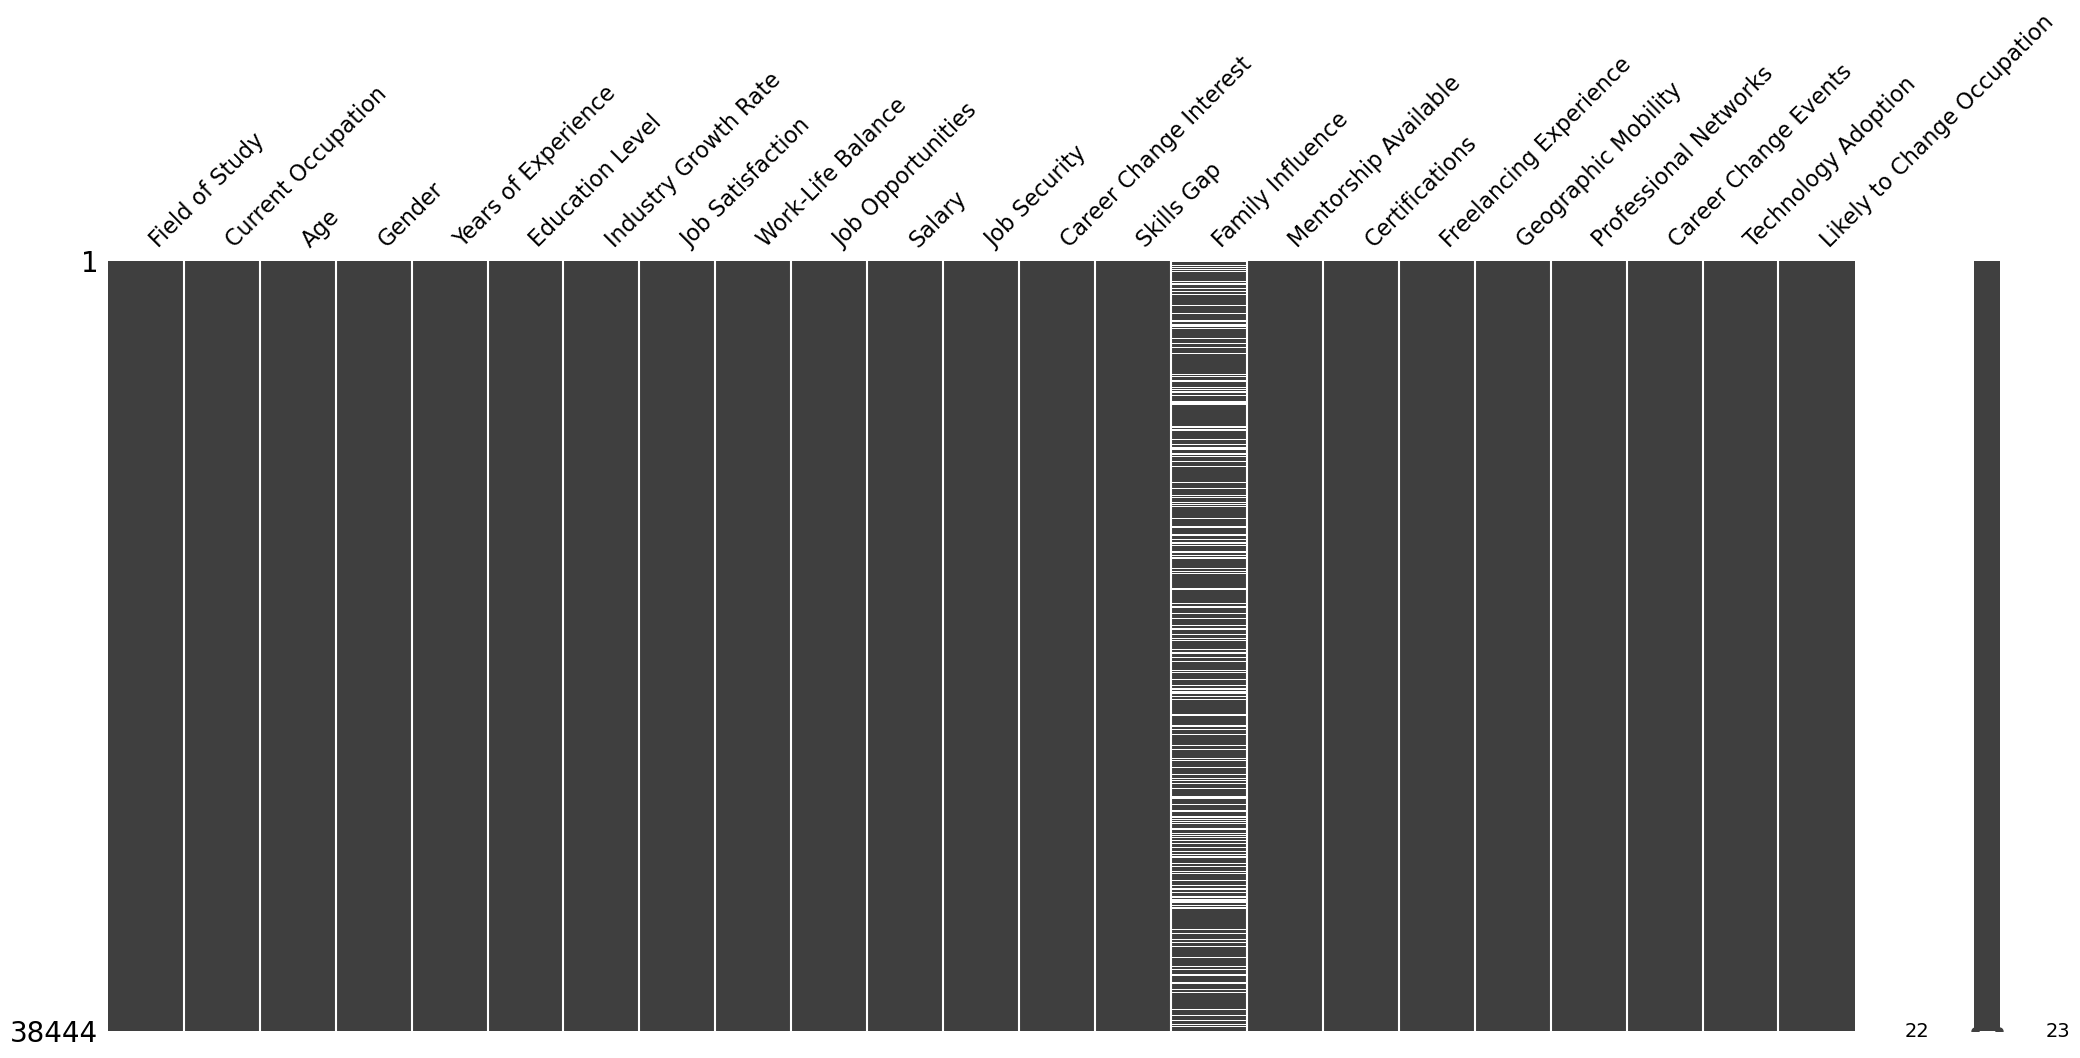

In [8]:
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(data)
plt.show()

In [9]:
data.loc[data['Family Influence']=='High', 'Family Influence']=2
data.loc[data['Family Influence']=='Medium', 'Family Influence']=1
data.loc[data['Family Influence']=='Low', 'Family Influence']=0

In [10]:
data['Family Influence'].head()

0    2
1    1
2    0
3    1
4    0
Name: Family Influence, dtype: object

In [11]:
mean = data['Family Influence'].mean()
mean

1.0026377898098016

In [12]:
missing = data[data['Family Influence'].isna()]
len(missing)

9632

In [13]:
data = data.fillna({'Family Influence': int(mean)})

In [14]:
data.loc[data['Family Influence']==2, 'Family Influence']='High'
data.loc[data['Family Influence']==1, 'Family Influence']='Medium'
data.loc[data['Family Influence']==0, 'Family Influence']='Low'

In [15]:
data.isna().sum()

Field of Study                 0
Current Occupation             0
Age                            0
Gender                         0
Years of Experience            0
Education Level                0
Industry Growth Rate           0
Job Satisfaction               0
Work-Life Balance              0
Job Opportunities              0
Salary                         0
Job Security                   0
Career Change Interest         0
Skills Gap                     0
Family Influence               0
Mentorship Available           0
Certifications                 0
Freelancing Experience         0
Geographic Mobility            0
Professional Networks          0
Career Change Events           0
Technology Adoption            0
Likely to Change Occupation    0
dtype: int64

In [16]:
data.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,False,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,False,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,False,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,True,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,False,0,1,0,2,0,7,1


In [17]:
data.describe()

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,39.540422,19.548200,5.489673,5.517012,50.308267,114975.623999,5.481896,0.199901,5.520133,0.298616,0.149204,0.303975,5.514098,1.003304,5.487904,0.576553
std,11.574509,11.552474,2.870407,2.879007,28.877294,48963.725598,2.870640,0.399931,2.870065,0.457657,0.356294,0.459978,2.868188,0.815953,2.857247,0.494111
min,20.000000,0.000000,1.000000,1.000000,1.000000,30005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,30.000000,10.000000,3.000000,3.000000,25.000000,72701.500000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,114861.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,1.000000
75%,50.000000,30.000000,8.000000,8.000000,75.000000,157241.000000,8.000000,0.000000,8.000000,1.000000,0.000000,1.000000,8.000000,2.000000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,199996.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,10.000000,2.000000,10.000000,1.000000


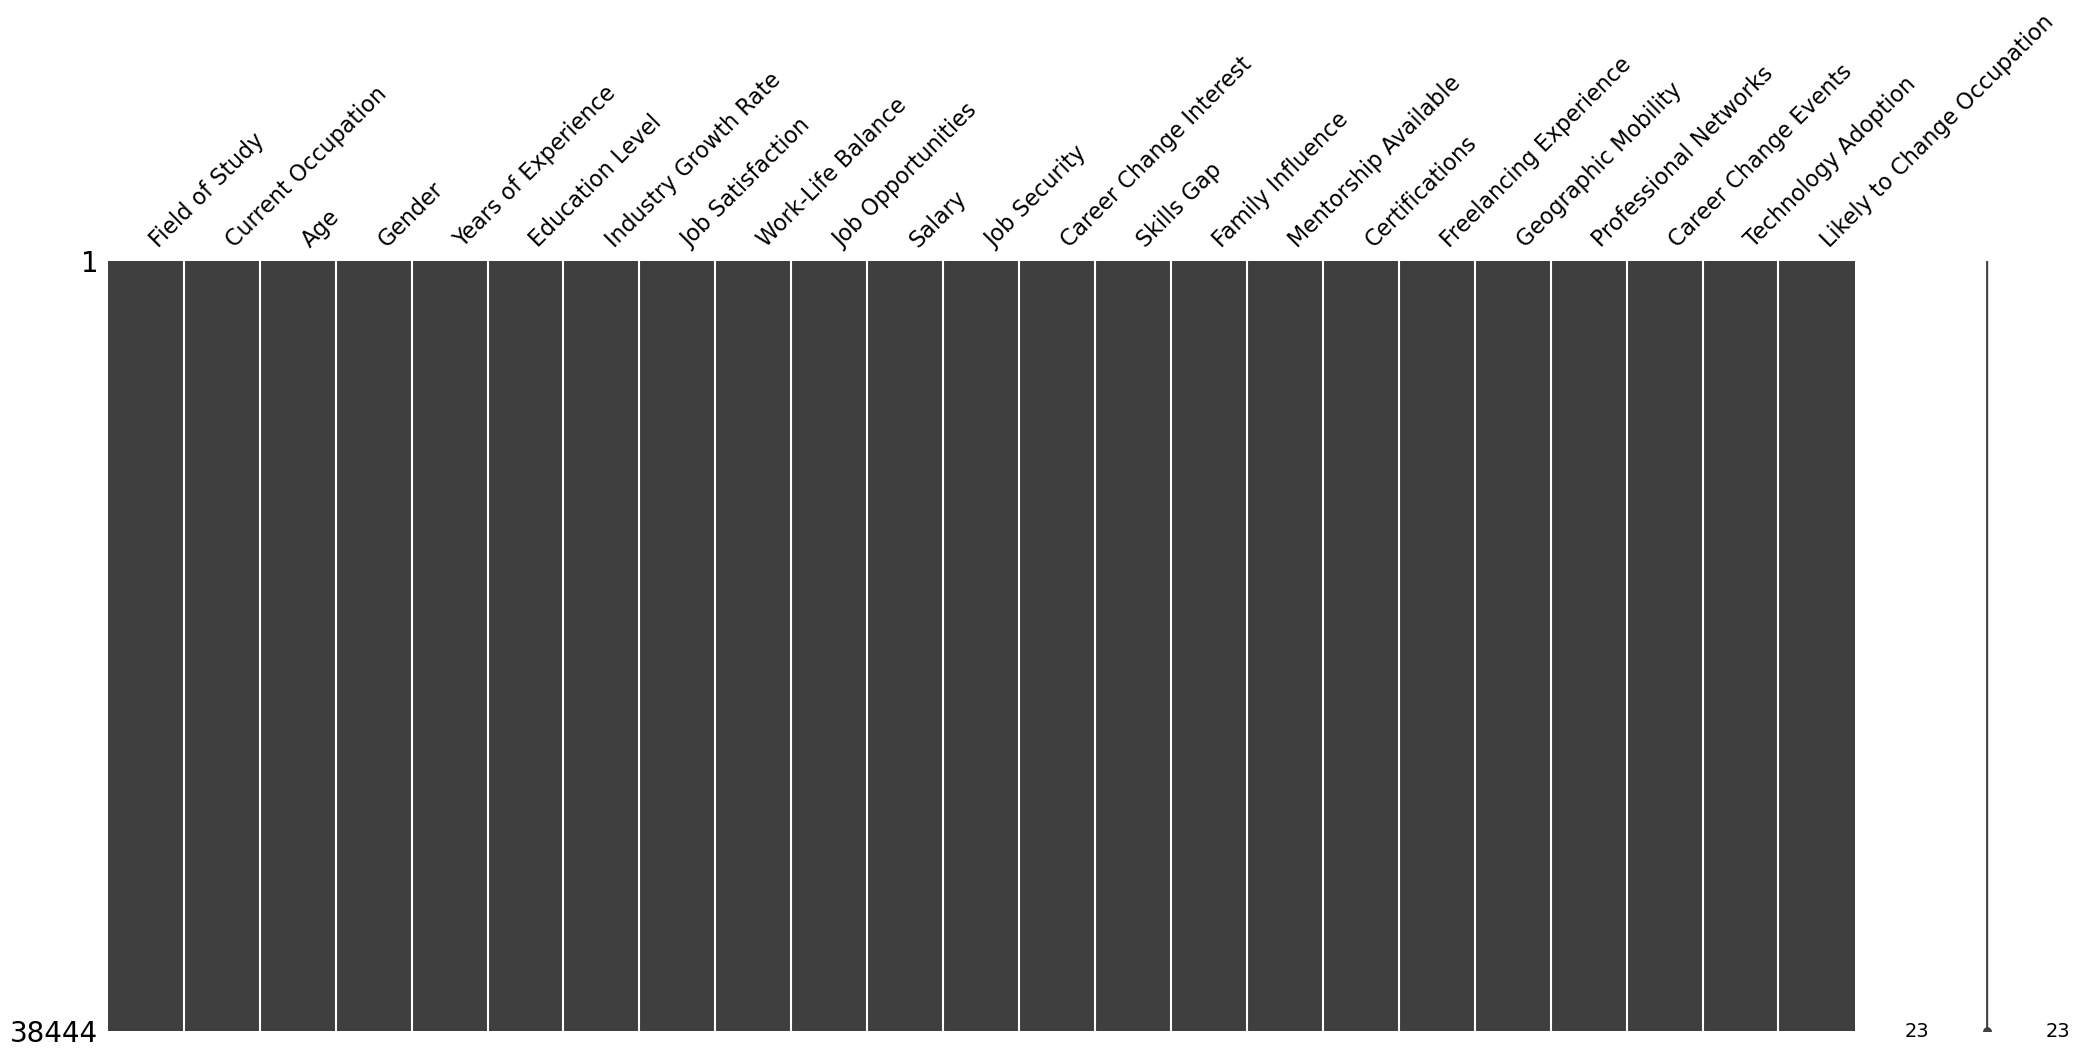

In [18]:
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missingness
msno.matrix(data)
plt.show()

In [19]:
data['Job Satisfaction'].max() - data['Job Satisfaction'].min()

9

In [20]:

Q3 = data['Job Opportunities'].quantile(0.75)
Q1 = data['Job Opportunities'].quantile(0.25)
IQR = Q3-Q1

lower = Q1-(1.5 * IQR)
upper = Q3+(1.5 * IQR)

outliers = data[(data['Job Opportunities'] < lower) | (data['Job Opportunities'] > upper)]
print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [Field of Study, Current Occupation, Age, Gender, Years of Experience, Education Level, Industry Growth Rate, Job Satisfaction, Work-Life Balance, Job Opportunities, Salary, Job Security, Career Change Interest, Skills Gap, Family Influence, Mentorship Available, Certifications, Freelancing Experience, Geographic Mobility, Professional Networks, Career Change Events, Technology Adoption, Likely to Change Occupation]
Index: []

[0 rows x 23 columns]


In [21]:
duplicates = data.duplicated()
duplicates.sum()

0

In [22]:
data[duplicates]

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation


In [23]:
gender = data['Gender']
gender.value_counts()

Gender
Female    19299
Male      19145
Name: count, dtype: int64

In [24]:
gender.unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [25]:
ed_level = data['Education Level']
ed_level.value_counts()

Education Level
PhD            9777
High School    9623
Master's       9597
Bachelor's     9447
Name: count, dtype: int64

In [26]:
ed_level.unique()

array(['High School', "Master's", 'PhD', "Bachelor's"], dtype=object)

In [27]:

for column in data.columns: 
    print(f'{column}: {data[column].unique()}')



Field of Study: ['Medicine' 'Education' 'Arts' 'Computer Science' 'Business'
 'Mechanical Engineering' 'Biology' 'Law' 'Economics' 'Psychology']
Current Occupation: ['Business Analyst' 'Economist' 'Biologist' 'Doctor' 'Lawyer'
 'Software Developer' 'Artist' 'Psychologist' 'Teacher'
 'Mechanical Engineer']
Age: [48 44 21 33 28 56 51 58 31 30 52 54 47 40 41 49 53 24 35 42 39 26 50 22
 57 25 34 27 59 29 43 38 55 20 23 45 32 37 36 46]
Gender: ['Male', 'Female']
Categories (2, object): ['Female', 'Male']
Years of Experience: [ 7 26 27 14  0 39 29 32 38 16 15 35 22 24 34 25 23 12 19  9  4 21 18 30
  1  5 28 31 17 20 36  2 33 10  3  8 11 13  6 37]
Education Level: ['High School' "Master's" 'PhD' "Bachelor's"]
Industry Growth Rate: ['High' 'Low' 'Medium']
Job Satisfaction: [ 7 10  8  3  9  1  5  2  6  4]
Work-Life Balance: [10  3  9  1  4  5  7  2  8  6]
Job Opportunities: [ 83  55  78  62   8  99  13  77  56  98  50  24  35  95  58  30  16 100
  90  36  42  27  39  44  76  82   1  47  51   4 

# Data Profiling

In [28]:
data.describe()

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,39.540422,19.548200,5.489673,5.517012,50.308267,114975.623999,5.481896,0.199901,5.520133,0.298616,0.149204,0.303975,5.514098,1.003304,5.487904,0.576553
std,11.574509,11.552474,2.870407,2.879007,28.877294,48963.725598,2.870640,0.399931,2.870065,0.457657,0.356294,0.459978,2.868188,0.815953,2.857247,0.494111
min,20.000000,0.000000,1.000000,1.000000,1.000000,30005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,30.000000,10.000000,3.000000,3.000000,25.000000,72701.500000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,114861.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,1.000000
75%,50.000000,30.000000,8.000000,8.000000,75.000000,157241.000000,8.000000,0.000000,8.000000,1.000000,0.000000,1.000000,8.000000,2.000000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,199996.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,10.000000,2.000000,10.000000,1.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Field of Study               38444 non-null  object  
 1   Current Occupation           38444 non-null  object  
 2   Age                          38444 non-null  int64   
 3   Gender                       38444 non-null  category
 4   Years of Experience          38444 non-null  int64   
 5   Education Level              38444 non-null  object  
 6   Industry Growth Rate         38444 non-null  object  
 7   Job Satisfaction             38444 non-null  int64   
 8   Work-Life Balance            38444 non-null  int64   
 9   Job Opportunities            38444 non-null  int64   
 10  Salary                       38444 non-null  int64   
 11  Job Security                 38444 non-null  int64   
 12  Career Change Interest       38444 non-null  int64   
 13  S

# Data Structuring

In [30]:
# reorganize by renaming columns
data = data.rename(columns={'Field of Study':'field_study', 
                            'Current Occupation': 'curr_occ',
                            'Years of Experience': 'experience',
                            'Education Level': 'ed_level',
                            'Likely to Change Occupation':'label',
                            'Industry Growth Rate':'growth_rate',
                            'Job Satisfaction':'job_satisfaction',
                            'Work-Life Balance':'work_life_balance',
                            'Job Opportunities':'job_oppr',
                            'Career Change Interest':'career_change_int',
                            'Skills Gap':'skills_gap',
                            'Family Influence': 'family_inf',
                            'Mentorship Available': 'mentorship_ava',
                            'Freelancing Experience': 'freelancing_exp',
                            'Geographic Mobility': 'geo_mobility',
                            'Professional Networks': 'professional_net',
                            'Career Change Events': 'career_change_events',
                            'Technology Adoption': 'technology_adopt'
                            
                           })
data.head()

,field_study,curr_occ,Age,Gender,experience,ed_level,growth_rate,job_satisfaction,work_life_balance,job_oppr,...,skills_gap,family_inf,mentorship_ava,Certifications,freelancing_exp,geo_mobility,professional_net,career_change_events,technology_adopt,label
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,False,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,False,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,False,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,True,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,False,0,1,0,2,0,7,1


In [31]:
data.columns

Index(['field_study', 'curr_occ', 'Age', 'Gender', 'experience', 'ed_level',
       'growth_rate', 'job_satisfaction', 'work_life_balance', 'job_oppr',
       'Salary', 'Job Security', 'career_change_int', 'skills_gap',
       'family_inf', 'mentorship_ava', 'Certifications', 'freelancing_exp',
       'geo_mobility', 'professional_net', 'career_change_events',
       'technology_adopt', 'label'],
      dtype='object')

# Data Transformation

In [32]:
data['field_study'].unique()

array(['Medicine', 'Education', 'Arts', 'Computer Science', 'Business',
       'Mechanical Engineering', 'Biology', 'Law', 'Economics',
       'Psychology'], dtype=object)

In [33]:
# Data encoding 
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le_fieldstudy = LabelEncoder()
curr_occ = LabelEncoder()
gender = LabelEncoder()
ed_level = LabelEncoder()
growth_rate = LabelEncoder()
family_inf = LabelEncoder()


# Fit and transform the Temperature and Color columns
data['field_study'] = le_fieldstudy.fit_transform(data['field_study'])
data['curr_occ'] = curr_occ.fit_transform(data['curr_occ'])
data['Gender'] = gender.fit_transform(data['Gender'])
data['ed_level'] = ed_level.fit_transform(data['ed_level'])
data['growth_rate'] = growth_rate.fit_transform(data['growth_rate'])
data['family_inf'] = family_inf.fit_transform(data['growth_rate'])

In [34]:
data['field_study']

0        8
1        5
2        5
3        5
4        0
        ..
38439    1
38440    7
38441    3
38442    0
38443    6
Name: field_study, Length: 38444, dtype: int32

In [35]:
data['curr_occ']

0        2
1        4
2        1
3        2
4        3
        ..
38439    2
38440    0
38441    6
38442    2
38443    6
Name: curr_occ, Length: 38444, dtype: int32

In [36]:
data['Gender']

0        1
1        1
2        0
3        1
4        0
        ..
38439    0
38440    0
38441    0
38442    1
38443    1
Name: Gender, Length: 38444, dtype: int32

In [37]:
data['ed_level']

0        1
1        2
2        2
3        3
4        3
        ..
38439    1
38440    1
38441    1
38442    3
38443    2
Name: ed_level, Length: 38444, dtype: int32

In [38]:
data['growth_rate']

0        0
1        1
2        1
3        2
4        1
        ..
38439    1
38440    1
38441    0
38442    2
38443    2
Name: growth_rate, Length: 38444, dtype: int32

In [39]:
data['family_inf']

0        0
1        1
2        1
3        2
4        1
        ..
38439    1
38440    1
38441    0
38442    2
38443    2
Name: family_inf, Length: 38444, dtype: int64

In [40]:
# Get the mapping of original values to encoded values 
mapping = dict(zip(le_fieldstudy.classes_, range(len(le_fieldstudy.classes_)))) 
print("Mapping:",mapping)

Mapping: {'Arts': 0, 'Biology': 1, 'Business': 2, 'Computer Science': 3, 'Economics': 4, 'Education': 5, 'Law': 6, 'Mechanical Engineering': 7, 'Medicine': 8, 'Psychology': 9}


In [41]:
mapping = dict(zip(curr_occ.classes_, range(len(curr_occ.classes_)))) 

print(mapping)

{'Artist': 0, 'Biologist': 1, 'Business Analyst': 2, 'Doctor': 3, 'Economist': 4, 'Lawyer': 5, 'Mechanical Engineer': 6, 'Psychologist': 7, 'Software Developer': 8, 'Teacher': 9}


In [42]:
mapping = dict(zip(gender.classes_, range(len(gender.classes_)))) 

print(mapping)

{'Female': 0, 'Male': 1}


In [43]:
mapping = dict(zip(ed_level.classes_, range(len(ed_level.classes_)))) 

print(mapping)

{"Bachelor's": 0, 'High School': 1, "Master's": 2, 'PhD': 3}


In [44]:
mapping = dict(zip(growth_rate.classes_, range(len(growth_rate.classes_)))) 

print(mapping)

{'High': 0, 'Low': 1, 'Medium': 2}


In [45]:
mapping = dict(zip(family_inf.classes_, range(len(family_inf.classes_)))) 

print(mapping)

{0: 0, 1: 1, 2: 2}


In [46]:
data.head()

,field_study,curr_occ,Age,Gender,experience,ed_level,growth_rate,job_satisfaction,work_life_balance,job_oppr,...,skills_gap,family_inf,mentorship_ava,Certifications,freelancing_exp,geo_mobility,professional_net,career_change_events,technology_adopt,label
0,8,2,48,1,7,1,0,7,10,83,...,8,0,False,0,0,1,2,0,1,0
1,5,4,44,1,26,2,1,10,3,55,...,3,1,False,0,1,1,2,1,9,0
2,5,1,21,0,27,2,1,8,3,78,...,4,1,False,0,0,0,2,1,2,0
3,5,2,33,1,14,3,2,7,9,62,...,2,2,True,0,0,0,9,0,1,0
4,0,3,28,0,0,3,1,3,1,8,...,5,1,False,0,1,0,2,0,7,1


In [47]:
data['mentorship_ava'] = data['mentorship_ava'].astype('int')

In [48]:
data.head()

,field_study,curr_occ,Age,Gender,experience,ed_level,growth_rate,job_satisfaction,work_life_balance,job_oppr,...,skills_gap,family_inf,mentorship_ava,Certifications,freelancing_exp,geo_mobility,professional_net,career_change_events,technology_adopt,label
0,8,2,48,1,7,1,0,7,10,83,...,8,0,0,0,0,1,2,0,1,0
1,5,4,44,1,26,2,1,10,3,55,...,3,1,0,0,1,1,2,1,9,0
2,5,1,21,0,27,2,1,8,3,78,...,4,1,0,0,0,0,2,1,2,0
3,5,2,33,1,14,3,2,7,9,62,...,2,2,1,0,0,0,9,0,1,0
4,0,3,28,0,0,3,1,3,1,8,...,5,1,0,0,1,0,2,0,7,1


# Data Enrichment

In [49]:
# adding new columns
data['networking'] = data['professional_net']*data['career_change_events']
data.head()

# to get the professional networks made through career change events

,field_study,curr_occ,Age,Gender,experience,ed_level,growth_rate,job_satisfaction,work_life_balance,job_oppr,...,family_inf,mentorship_ava,Certifications,freelancing_exp,geo_mobility,professional_net,career_change_events,technology_adopt,label,networking
0,8,2,48,1,7,1,0,7,10,83,...,0,0,0,0,1,2,0,1,0,0
1,5,4,44,1,26,2,1,10,3,55,...,1,0,0,1,1,2,1,9,0,2
2,5,1,21,0,27,2,1,8,3,78,...,1,0,0,0,0,2,1,2,0,2
3,5,2,33,1,14,3,2,7,9,62,...,2,1,0,0,0,9,0,1,0,0
4,0,3,28,0,0,3,1,3,1,8,...,1,0,0,1,0,2,0,7,1,0


# Data Visualization

In [50]:
# histogram
# scatterplot
# correlation matrix

Text(0.5, 1.0, 'Histogram of Ages')

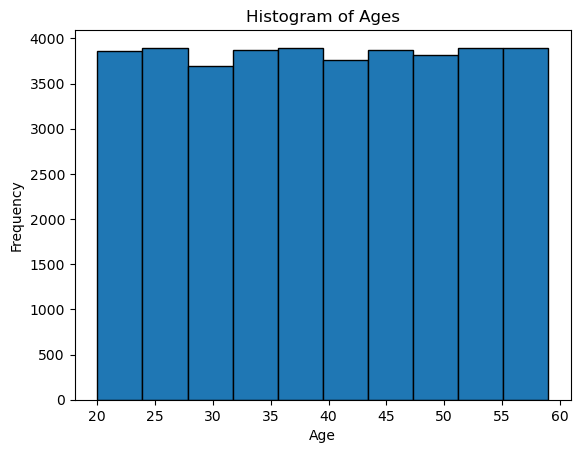

In [51]:

plt.hist(data['Age'], bins=10, edgecolor='black') 
plt.xlabel('Age') 
plt.ylabel('Frequency') 
plt.title('Histogram of Ages')

Text(0.5, 1.0, 'Histogram of Salary')

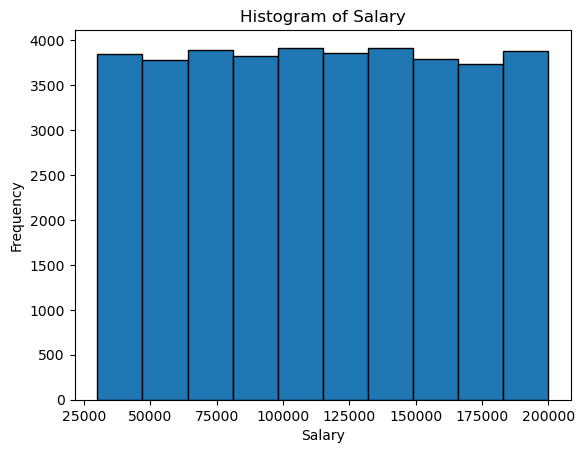

In [52]:
plt.hist(data['Salary'], bins=10, edgecolor='black') 
plt.xlabel('Salary') 
plt.ylabel('Frequency') 
plt.title('Histogram of Salary')

In [53]:
data['label']

0        0
1        0
2        0
3        0
4        1
        ..
38439    1
38440    1
38441    1
38442    0
38443    0
Name: label, Length: 38444, dtype: int64

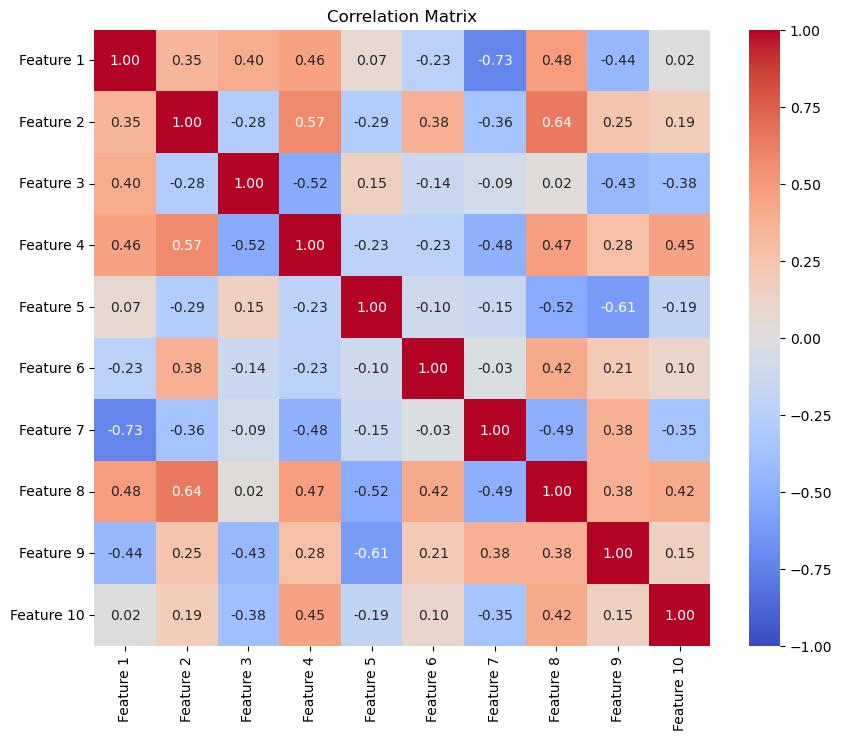

In [54]:
# correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
np.random.seed(0)
data_ran = np.random.rand(10, 10)

# Compute the correlation matrix
corr = np.corrcoef(data_ran, rowvar=False)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, fmt='.2f',
            xticklabels=[f'Feature {i}' for i in range(1, 11)],
            yticklabels=[f'Feature {i}' for i in range(1, 11)])

# Add title
plt.title('Correlation Matrix')

# Show plot
plt.show()


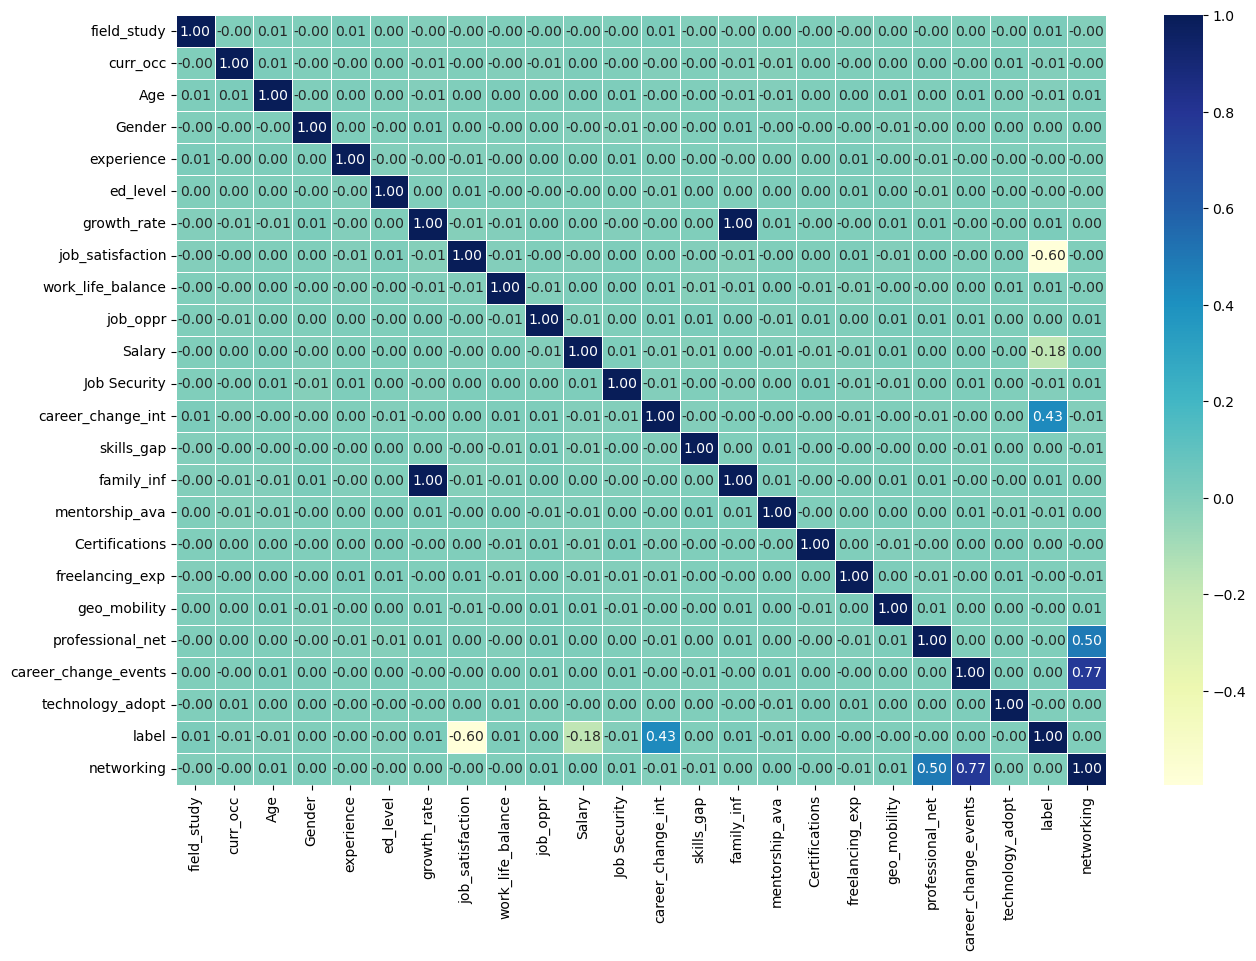

In [55]:

corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

# Modeling

In [56]:
label = data['label']
label.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [57]:
features = data.drop('label', axis = 1)
features.head()

,field_study,curr_occ,Age,Gender,experience,ed_level,growth_rate,job_satisfaction,work_life_balance,job_oppr,...,skills_gap,family_inf,mentorship_ava,Certifications,freelancing_exp,geo_mobility,professional_net,career_change_events,technology_adopt,networking
0,8,2,48,1,7,1,0,7,10,83,...,8,0,0,0,0,1,2,0,1,0
1,5,4,44,1,26,2,1,10,3,55,...,3,1,0,0,1,1,2,1,9,2
2,5,1,21,0,27,2,1,8,3,78,...,4,1,0,0,0,0,2,1,2,2
3,5,2,33,1,14,3,2,7,9,62,...,2,2,1,0,0,0,9,0,1,0
4,0,3,28,0,0,3,1,3,1,8,...,5,1,0,0,1,0,2,0,7,0


In [58]:
from sklearn.model_selection import train_test_split



In [59]:
np.random.seed(20)

features_tr, features_test, label_tr, label_test = train_test_split(features, label, train_size=0.3) 

In [60]:
print(len(features_tr))

11533


In [61]:
print(len(features_test))

26911


In [62]:
print(len(label_tr))

11533


In [63]:
print(len(label_test))

26911


In [64]:
# Scaling the numerical features 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns =['Age', 'experience', 'job_satisfaction', 'work_life_balance', 'job_oppr', 
                   'Salary', 'Job Security', 'skills_gap', 'mentorship_ava', 'Certifications',
                   'freelancing_exp', 'geo_mobility', 'professional_net', 'career_change_events',
                   'technology_adopt']

# Scaling the numerical columns
features_tr[numerical_columns] = scaler.fit_transform(features_tr[numerical_columns])
features_test[numerical_columns] = scaler.transform(features_test[numerical_columns])

features_tr.head()

,field_study,curr_occ,Age,Gender,experience,ed_level,growth_rate,job_satisfaction,work_life_balance,job_oppr,...,skills_gap,family_inf,mentorship_ava,Certifications,freelancing_exp,geo_mobility,professional_net,career_change_events,technology_adopt,networking
23855,4,5,0.471132,1,-0.400975,1,2,-0.880774,0.499317,-1.043744,...,1.573477,2,-0.658454,-0.660078,-0.424794,-0.661838,0.518787,-0.006274,-1.543716,7
1079,8,7,-0.905194,1,0.811086,0,2,-0.880774,-1.588905,1.608696,...,1.223853,2,-0.658454,1.514973,-0.424794,1.510943,-0.523275,-1.232773,-0.502342,0
7458,7,0,-1.679377,0,0.118480,1,2,0.517962,-0.544794,-1.147086,...,1.573477,2,-0.658454,-0.660078,-0.424794,-0.661838,0.866141,-0.006274,0.191907,8
18801,6,2,-0.303051,0,-1.266734,0,0,-0.880774,0.847353,0.471936,...,-0.174646,0,1.518710,-0.660078,2.354080,1.510943,1.560849,-0.006274,0.539032,10
15688,8,0,1.159294,1,-0.141248,0,0,0.867646,0.499317,1.470907,...,0.524604,0,-0.658454,1.514973,-0.424794,1.510943,-1.217983,-1.232773,-1.196592,0


In [65]:
# training the model

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# defining a parameter grid to have a list of parameters to choose the best 
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1, 2, 4, 6],
    'min_samples_leaf': [2, 4, 6, 8],
    'min_impurity_decrease': [0.01, 0.1, 0, 1]
}

# Initializing the decision tree
dec_tree = DecisionTreeClassifier()

# Defining a stratifiedKfold object
from sklearn.model_selection import StratifiedKFold
str_kfold = StratifiedKFold(n_splits=5, shuffle=True)

from sklearn.metrics import f1_score, make_scorer, confusion_matrix
f1_score = make_scorer(f1_score)

grid_search = GridSearchCV(estimator=dec_tree, param_grid=param_grid, cv=str_kfold, scoring=f1_score, return_train_score=True)

grid_search.fit(features_tr, label_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 4, 6],
                         'min_impurity_decrease': [0.01, 0.1, 0, 1],
                         'min_samples_leaf': [2, 4, 6, 8]},
             return_train_score=True, scoring=make_scorer(f1_score))

In [67]:
# Printing the model's best parameters
print("The model's best parameters are: ",grid_search.best_params_)

The model's best parameters are:  {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 2}


In [68]:
# Printing the weighted mean cross-validation score
print("F1 score: ", grid_search.best_score_)

F1 score:  1.0


# Model Evaluation


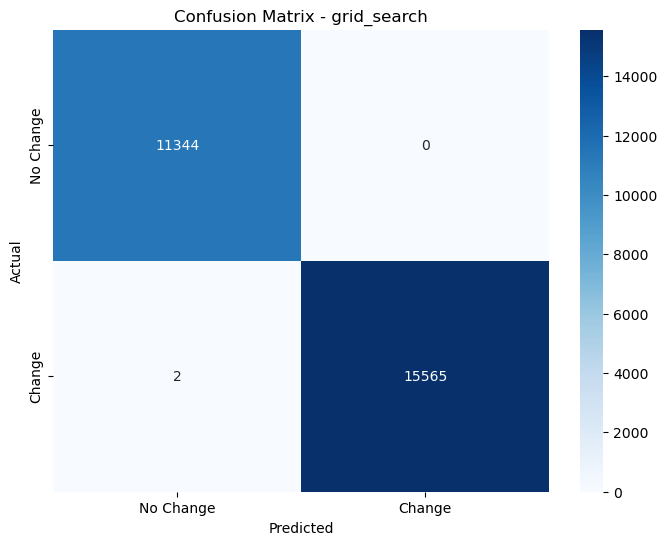

In [69]:
# Plotting the confusion matrix for the best model

pred = grid_search.predict(features_test)

# Storing values for the confusion matrix
confusion_mat = confusion_matrix(label_test, pred)

# Plotting the confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Change', 'Change'], yticklabels=['No Change', 'Change'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - grid_search')
plt.show()

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('SVC', SVC())
])

# defining a parameter grid for SVC
param_grid_svc = {
    'SVC__C': [0.01, 0.1],
    'SVC__gamma': [0.01, 0.2],
    'SVC__kernel': ['linear', 'rbf']
}

grid_search_svc = GridSearchCV(pipeline, param_grid_svc, cv=str_kfold, \
                              scoring=f1_score, return_train_score=True)

grid_search_svc.fit(features_tr, label_tr)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             param_grid={'SVC__C': [0.01, 0.1], 'SVC__gamma': [0.01, 0.2],
                         'SVC__kernel': ['linear', 'rbf']},
             return_train_score=True, scoring=make_scorer(f1_score))

In [71]:
# Printing the SVM model's best parameters
print(f"The grid_seach_svc's best parameters are: {grid_search_svc.best_params_}")

The grid_seach_svc's best parameters are: {'SVC__C': 0.1, 'SVC__gamma': 0.01, 'SVC__kernel': 'rbf'}


In [72]:
# Printing the cross-validation score for Support Vector Classifier
print("F1 score: ", grid_search.best_score_)

F1 score:  1.0


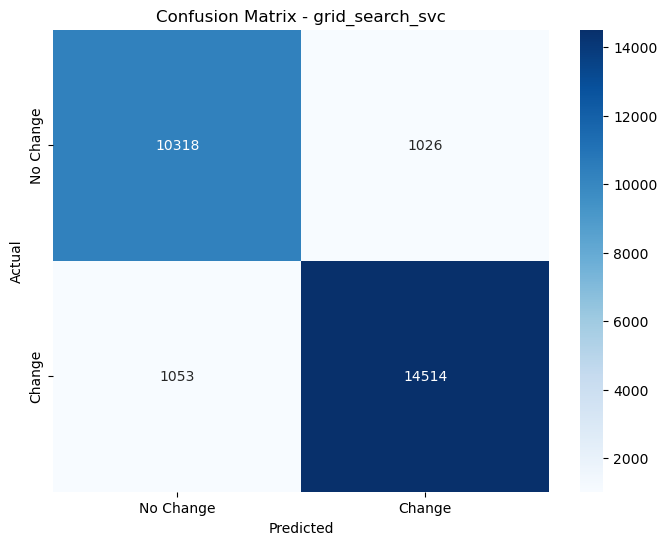

In [74]:
# Plotting the confusion matrix for grid_search_svc 
pred_svc = grid_search_svc.predict(features_test)

# Calculating the Confusion matrix
con_mat_svc = confusion_matrix(label_test, pred_svc)

# Plotting the confusion_matrix
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat_svc, annot=True, fmt='d', cmap='Blues', xticklabels=['No Change', 'Change'], yticklabels=['No Change', 'Change'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - grid_search_svc')
plt.show()



The confusion_matrix show that the f_score being 1 for both the models on the training data, the decision tree is better performing on the test data.
Whereas the SVC  has learned the training data rather than generalizing the underlying features as when predicting the test data, it makes errors.

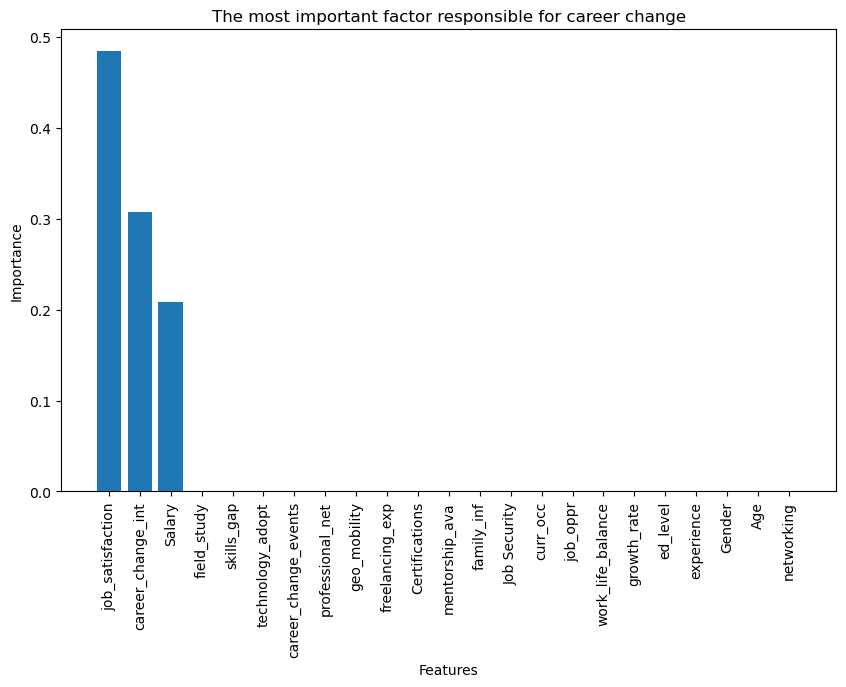

In [75]:
# defining the best model
best_model = grid_search.best_estimator_

# Using the best model to get feature importances
feature_importance = best_model.feature_importances_

# Storing the features imporatnce ratio in a DataFrame
importance_df = pd.DataFrame({
    'Feature': features_tr.columns,
    'Importance': feature_importance
})

# Sorting the dataframe in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the most important features
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('The most important factor responsible for career change')
plt.show()